<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/SMOTE-NearMiss%20with%20Hybrid%20RF-LSTM%20(100%20ep.)%2010%20classes%20(28042024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SMOTE-NearMiss with Hybrid RF-LSTM (100 ep.) 10 classes**

In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter

In [195]:
# Load dataset
dataset = pd.read_csv("dataset_P2.2.csv")
#print(dataset.shape)

In [196]:
print(dataset.isnull().sum())

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64


In [197]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [198]:
print(dataset["Class"].unique())

[0 2 1 5 8 7 4 3 9 6]


In [199]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.utils import np_utils
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=10)  # update to 10 classes
X = dataset.drop(['Class'], axis=1)
X = X.values
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


In [200]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.000000e+00 1.214780e-01 6.000000e+00 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 [2.000000e+00 6.499020e-01 1.400000e+01 ... 1.000000e+00 6.000000e+00
  0.000000e+00]
 [3.000000e+00 1.623129e+00 8.000000e+00 ... 2.000000e+00 6.000000e+00
  0.000000e+00]
 ...
 [1.753390e+05 9.000000e-06 2.000000e+00 ... 3.000000e+00 1.200000e+01
  0.000000e+00]
 [1.753400e+05 9.000000e-06 2.000000e+00 ... 3.000000e+01 3.000000e+01
  0.000000e+00]
 [1.753410e+05 9.000000e-06 2.000000e+00 ... 3.000000e+01 3.000000e+01
  0.000000e+00]]
[0 0 0 ... 6 6 6]


In [201]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 56000, 6: 40000, 4: 33393, 5: 18184, 3: 12264, 7: 10491, 1: 2000, 2: 1746, 8: 1133, 9: 130})


In [202]:
y

array([0, 0, 0, ..., 6, 6, 6])

In [203]:
# Check class distribution
counter = Counter(y)
print("Before SMOTE:", counter)

Before SMOTE: Counter({0: 56000, 6: 40000, 4: 33393, 5: 18184, 3: 12264, 7: 10491, 1: 2000, 2: 1746, 8: 1133, 9: 130})


In [204]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 56000, 2: 56000, 1: 56000, 5: 56000, 8: 56000, 7: 56000, 4: 56000, 3: 56000, 9: 56000, 6: 56000})


##################################

In [205]:
# Apply NearMiss for undersampling
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

In [206]:
print("After NearMiss:", Counter(y_res))

After NearMiss: Counter({0: 56000, 1: 56000, 2: 56000, 3: 56000, 4: 56000, 5: 56000, 6: 56000, 7: 56000, 8: 56000, 9: 56000})


In [208]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [209]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed
from tensorflow.keras.regularizers import l2
import numpy as np

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Extract features from RF model
train_rf_features = rf_model.predict(X_train)
test_rf_features = rf_model.predict(X_test)

# Reshape RF features for LSTM input
#train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, train_rf_features.shape[1]))
#test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, test_rf_features.shape[1]))
train_rf_features = np.reshape(train_rf_features, (train_rf_features.shape[0], 1, 1))
test_rf_features = np.reshape(test_rf_features, (test_rf_features.shape[0], 1, 1))

In [210]:
train_rf_features = train_rf_features[:y_train.shape[0]]
#y_train = np.concatenate((y_train, np.zeros((train_rf_features.shape[0] - y_train.shape[0], 4))))

In [211]:
from tensorflow.keras.utils import to_categorical
# Train LSTM model with RF features
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, train_rf_features.shape[2]), return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(16, kernel_regularizer=l2(0.0001)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(10, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=10)  # One-hot encode y_train

history = lstm_model.fit(train_rf_features, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Evaluate hybrid model on test set
test_lstm_features = lstm_model.predict(test_rf_features)
test_rf_lstm_predictions = np.argmax(test_lstm_features, axis=1)

Epoch 1/100
5600/5600 [==============================] - 44s 7ms/step - loss: 0.3426 - accuracy: 0.9094 - val_loss: 0.0560 - val_accuracy: 1.0000
Epoch 2/100
5600/5600 [==============================] - 36s 6ms/step - loss: 0.0859 - accuracy: 0.9889 - val_loss: 0.0370 - val_accuracy: 1.0000
Epoch 3/100
5600/5600 [==============================] - 37s 7ms/step - loss: 0.0633 - accuracy: 0.9918 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 4/100
5600/5600 [==============================] - 35s 6ms/step - loss: 0.0525 - accuracy: 0.9928 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 5/100
5600/5600 [==============================] - 35s 6ms/step - loss: 0.0449 - accuracy: 0.9938 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 6/100
5600/5600 [==============================] - 37s 7ms/step - loss: 0.0420 - accuracy: 0.9938 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 7/100
5600/5600 [==============================] - 36s 7ms/step - loss: 0.0398 - accuracy: 0.9941 - val_loss: 0.0207 -

Confusion Matrix:
[[10760    20     0     2    19   387     0     2    10     0]
 [    1  9101   948   796   174    64     2    81     5     0]
 [    0   684  9416   610   124    49     3   239    26     0]
 [    1  1220  1203  6573  1704   198    21   292    81    10]
 [    3   384   358  1466  8339   214    15   250   108    21]
 [   34   210   232   276   163 10058     4    78    93     1]
 [    0     6    22    52   102    16 11079     4     7     2]
 [    0   356   646   513   220    65     3  9408   128     0]
 [    0     0     0     1     5    10     0     2 11141     0]
 [    0     0     0     0     4     0     0     0     0 11075]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11200
           1       0.76      0.81      0.79     11172
           2       0.73      0.84      0.79     11151
           3       0.64      0.58      0.61     11303
           4       0.77      0.75      0.76     11158
  

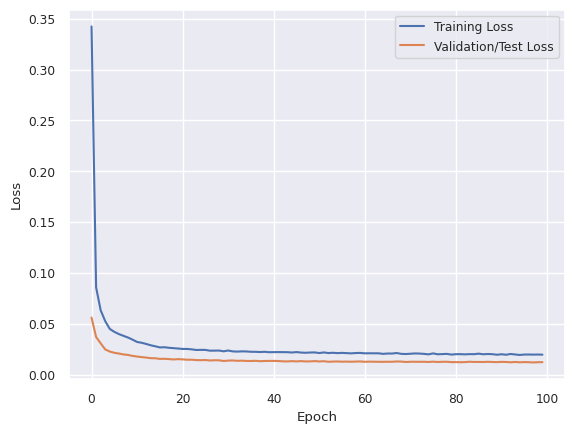

In [212]:
import collections as c

# Calculate the confusion matrix and classification report
# Ensure that y_test and test_rf_lstm_predictions are 2D arrays
confusion = confusion_matrix(y_test, test_rf_lstm_predictions)
classification_report_result = classification_report(y_test, test_rf_lstm_predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report_result)

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [215]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_rf_lstm_predictions)
recall = recall_score(y_test, test_rf_lstm_predictions, average='weighted')
precision = precision_score(y_test, test_rf_lstm_predictions, average='weighted')
f1score = f1_score(y_test, test_rf_lstm_predictions, average='weighted')
confusion_mat = confusion_matrix(y_test, test_rf_lstm_predictions)
classification_rep = classification_report(y_test, test_rf_lstm_predictions)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1score)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.865625
Recall: 0.865625
Precision: 0.8666975245284031
F1-Score: 0.865275617254119
Confusion Matrix:
 [[10760    20     0     2    19   387     0     2    10     0]
 [    1  9101   948   796   174    64     2    81     5     0]
 [    0   684  9416   610   124    49     3   239    26     0]
 [    1  1220  1203  6573  1704   198    21   292    81    10]
 [    3   384   358  1466  8339   214    15   250   108    21]
 [   34   210   232   276   163 10058     4    78    93     1]
 [    0     6    22    52   102    16 11079     4     7     2]
 [    0   356   646   513   220    65     3  9408   128     0]
 [    0     0     0     1     5    10     0     2 11141     0]
 [    0     0     0     0     4     0     0     0     0 11075]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     11200
           1       0.76      0.81      0.79     11172
           2       0.73      0.84      0.79     11151
           3   

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  #plt.figure(figsize=(6,5.5))
  plt.figure(figsize=(8,6.5))
  #ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='tab20c')
  ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap="PuBu",
                 vmin=0, vmax=12000, center=0, square=True, linewidths=1.5)
  sns.set(font_scale=0.8)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid RF-LSTM Model


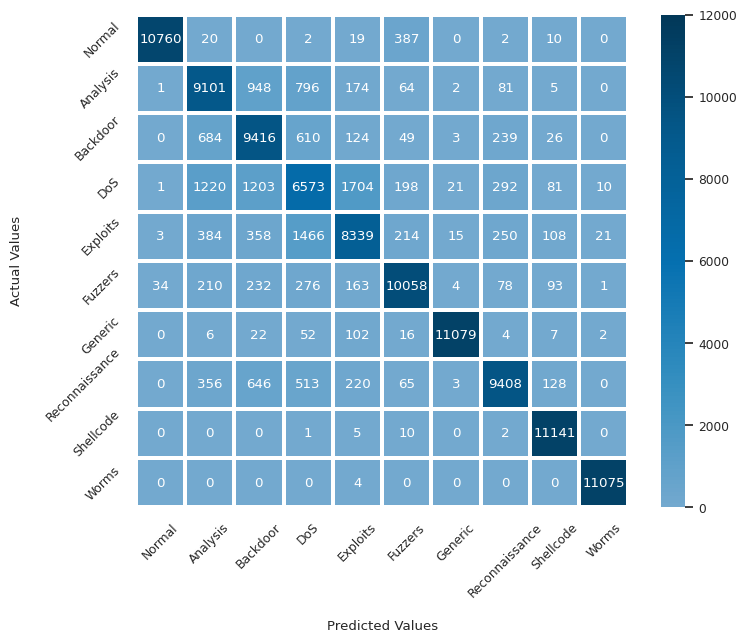

In [226]:
print("Confusion Matrix of Hybrid RF-LSTM Model")
conf_mat(y_test, test_rf_lstm_predictions)

In [228]:
# Compute TP, TN, FP, FN for each class
cm = confusion_matrix(y_test, test_rf_lstm_predictions)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for each class
FPR = FP / (FP + TN)
TPR = TP / (TP + FN)

# Print FPR and TPR for each class
for i in range(10):
    print(f"Class {i} - FPR: {FPR[i]}, TPR: {TPR[i]}")

Class 0 - FPR: 0.0003869047619047619, TPR: 0.9607142857142857
Class 1 - FPR: 0.028563494267465385, TPR: 0.814625850340136
Class 2 - FPR: 0.03380301242451586, TPR: 0.8444085732221326
Class 3 - FPR: 0.03690278757063269, TPR: 0.5815270282225957
Class 4 - FPR: 0.024940005156581582, TPR: 0.7473561570173867
Class 5 - FPR: 0.009945364944323805, TPR: 0.9021436900170419
Class 6 - FPR: 0.00047661602621388145, TPR: 0.9813108945969885
Class 7 - FPR: 0.009417748681217154, TPR: 0.829702795660993
Class 8 - FPR: 0.004541803433127398, TPR: 0.9983869522358634
Class 9 - FPR: 0.0003368971769998316, TPR: 0.9996389565845293


In [229]:
# prompt: Show the detection rates of the model in 8 digits numerical

# Calculate detection rates and format them to 8 digits
detection_rates = TP / (TP + FN)
detection_rates_formatted = ["{:.10f}".format(rate) for rate in detection_rates]

# Print detection rates
for i, rate in enumerate(detection_rates_formatted):
    print(f"Class {i} Detection Rate: {rate}")


Class 0 Detection Rate: 0.9607142857
Class 1 Detection Rate: 0.8146258503
Class 2 Detection Rate: 0.8444085732
Class 3 Detection Rate: 0.5815270282
Class 4 Detection Rate: 0.7473561570
Class 5 Detection Rate: 0.9021436900
Class 6 Detection Rate: 0.9813108946
Class 7 Detection Rate: 0.8297027957
Class 8 Detection Rate: 0.9983869522
Class 9 Detection Rate: 0.9996389566


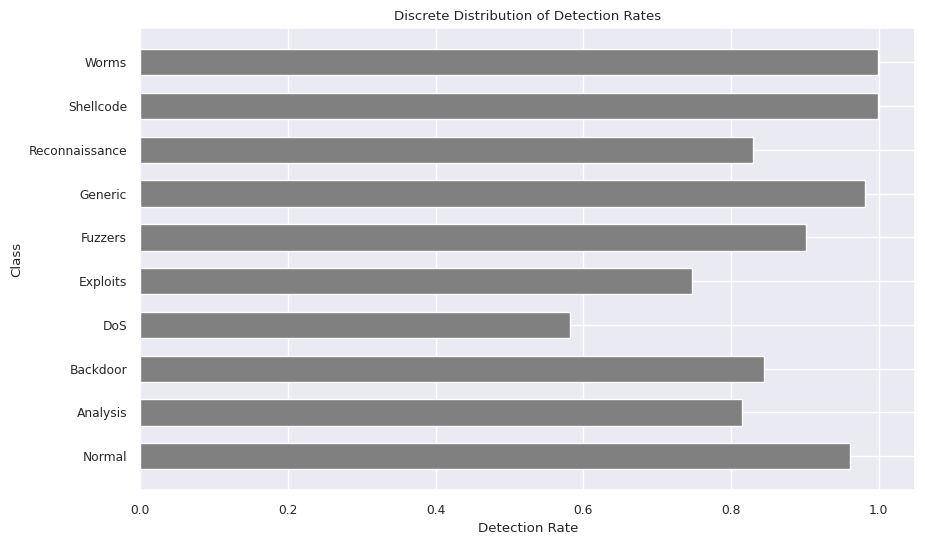

In [230]:
# prompt: Create Discrete distribution as horizontal bar chart of the detection rates of class 0-3

import numpy as np
import matplotlib.pyplot as plt

# Create a list of class labels
class_labels = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']

# Create a list of detection rates
detection_rates = [0.9607142857, 0.8146258503, 0.8444085732, 0.5815270282, 0.7473561570, 0.9021436900, 0.9813108946, 0.8297027957,
                    0.9983869522, 0.9996389566]

# Set the bar width
bar_width = 0.6

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(class_labels, detection_rates, bar_width, align='center', color='grey')

# Set the axis labels and title
plt.xlabel('Detection Rate')
plt.ylabel('Class')
plt.title('Discrete Distribution of Detection Rates')

# Display the chart
plt.show()


3500/3500 [==============================] - 13s 4ms/step


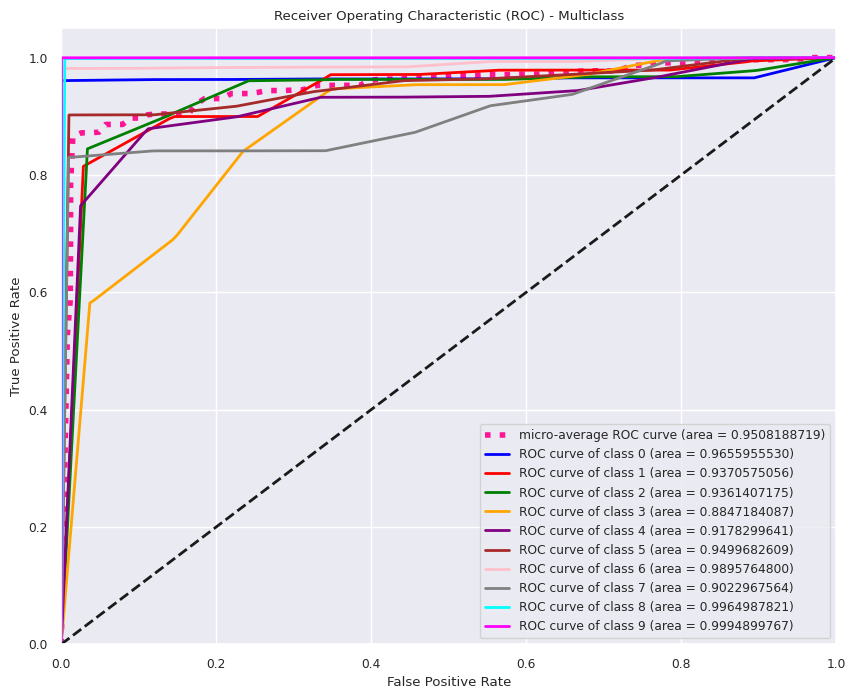

In [232]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming that y_test is not one-hot encoded
# Binarize the output labels for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_bin.shape[1]

# Predict class probabilities for LSTM model
test_lstm_probs = lstm_model.predict(test_rf_features)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_lstm_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), test_lstm_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# Plot micro-average ROC curve
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.10f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.10f})'.format(i, roc_auc[i]))

# Plot chance level
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()

# Optionally, you could compute and print the macro-average ROC curve and AUC
# However, this would require computing the average FPR and TPR across all classes,
# which could be misleading in a multiclass setting and thus is often omitted.